## tsfresh

pip install tsfresh

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly

In [2]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute, make_forecasting_frame
from tsfresh.feature_extraction import ComprehensiveFCParameters, settings


In [3]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
# Reading the data
data = pd.read_csv('airline-passengers.csv')

--2022-05-05 08:33:48--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.3’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-05-05 08:33:49 (35.2 MB/s) - ‘airline-passengers.csv.3’ saved [2180/2180]



In [4]:
data.shape

(144, 2)

In [5]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.dtypes

Month         object
Passengers     int64
dtype: object

In [7]:
data.columns = ['month','#Passengers']
data['month'] = pd.to_datetime(data['month'],infer_datetime_format=True,format='%y%m')

df_pass, y_air = make_forecasting_frame(data["#Passengers"], kind="#Passengers", max_timeshift=12, rolling_direction=1)
print(df_pass)

Rolling: 100%|██████████| 10/10 [00:00<00:00, 22.92it/s]


             id  time  value         kind
196     (id, 1)     0    112  #Passengers
198     (id, 2)     0    112  #Passengers
199     (id, 2)     1    118  #Passengers
201     (id, 3)     0    112  #Passengers
202     (id, 3)     1    118  #Passengers
...         ...   ...    ...          ...
1593  (id, 143)   138    622  #Passengers
1594  (id, 143)   139    606  #Passengers
1595  (id, 143)   140    508  #Passengers
1596  (id, 143)   141    461  #Passengers
1597  (id, 143)   142    390  #Passengers

[1650 rows x 4 columns]


In [8]:
extraction_settings = ComprehensiveFCParameters()
features = extract_features(df_pass, column_id="id", column_sort="time", column_value="value", impute_function=impute,
                     show_warnings=False,
                     default_fc_parameters=extraction_settings
                     )

Feature Extraction: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


In [9]:
features

value__variance_larger_than_standard_deviation  \
id 1                                               0.0   
   2                                               1.0   
   3                                               1.0   
   4                                               1.0   
   5                                               1.0   
...                                                ...   
   139                                             1.0   
   140                                             1.0   
   141                                             1.0   
   142                                             1.0   
   143                                             1.0   

        value__has_duplicate_max  value__has_duplicate_min  \
id 1                         0.0                       0.0   
   2                         0.0                       0.0   
   3                         0.0                       0.0   
   4                         0.0                       0.0   
   5                         0.0                       0.0   
...                          ...                       ...   
   139                       0.0                       0.0   
   140                       0.0                       0.0   
   141                       0.0                       0.0   
   142                       0.0                       0.0   
   143                       0.0                       0.0   

        value__has_duplicate  value__sum_values  value__abs_energy  \
id 1                     0.0              112.0            12544.0   
   2                     0.0              230.0            26468.0   
   3                     0.0              362.0            43892.0   
   4                     0.0              491.0            60533.0   
   5                     0.0              612.0            75174.0   
...                      ...                ...                ...   
   139                   0.0             5513.0          2598313.0   
   140                   0.0             5560.0          2653068.0   
   141                   0.0             5605.0          2696763.0   
   142                   1.0             5659.0          2743635.0   
   143                   1.0             5687.0          2764691.0   

        value__mean_abs_change  value__mean_change  \
id 1                 22.363636            2.272727   
   2                  6.000000            6.000000   
   3                 10.000000           10.000000   
   4                  7.666667            5.666667   
   5                  7.750000            2.250000   
...                        ...                 ...   
   139               46.272727            5.727273   
   140               39.000000           13.000000   
   141               42.818182            9.181818   
   142               43.000000            9.000000   
   143               45.545455           -1.363636   

        value__mean_second_derivative_central  value__median  ...  \
id 1                                -0.500000          112.0  ...   
   2                                -0.500000          115.0  ...   
   3                                 4.000000          118.0  ...   
   4                                -2.250000          123.5  ...   
   5                                -2.333333          121.0  ...   
...                                       ...            ...  ...   
   139                               9.150000          440.0  ...   
   140                               2.000000          440.0  ...   
   141                              -2.650000          440.0  ...   
   142                              -4.500000          461.0  ...   
   143                              -4.150000          461.0  ...   

        value__permutation_entropy__dimension_6__tau_1  \
id 1                                           1.94591   
   2                                           1.94591   
   3                                           1.94591   
   4           

In [10]:
from tsfresh.utilities.dataframe_functions import impute
impute(features)

value__variance_larger_than_standard_deviation  \
id 1                                               0.0   
   2                                               1.0   
   3                                               1.0   
   4                                               1.0   
   5                                               1.0   
...                                                ...   
   139                                             1.0   
   140                                             1.0   
   141                                             1.0   
   142                                             1.0   
   143                                             1.0   

        value__has_duplicate_max  value__has_duplicate_min  \
id 1                         0.0                       0.0   
   2                         0.0                       0.0   
   3                         0.0                       0.0   
   4                         0.0                       0.0   
   5                         0.0                       0.0   
...                          ...                       ...   
   139                       0.0                       0.0   
   140                       0.0                       0.0   
   141                       0.0                       0.0   
   142                       0.0                       0.0   
   143                       0.0                       0.0   

        value__has_duplicate  value__sum_values  value__abs_energy  \
id 1                     0.0              112.0            12544.0   
   2                     0.0              230.0            26468.0   
   3                     0.0              362.0            43892.0   
   4                     0.0              491.0            60533.0   
   5                     0.0              612.0            75174.0   
...                      ...                ...                ...   
   139                   0.0             5513.0          2598313.0   
   140                   0.0             5560.0          2653068.0   
   141                   0.0             5605.0          2696763.0   
   142                   1.0             5659.0          2743635.0   
   143                   1.0             5687.0          2764691.0   

        value__mean_abs_change  value__mean_change  \
id 1                 22.363636            2.272727   
   2                  6.000000            6.000000   
   3                 10.000000           10.000000   
   4                  7.666667            5.666667   
   5                  7.750000            2.250000   
...                        ...                 ...   
   139               46.272727            5.727273   
   140               39.000000           13.000000   
   141               42.818182            9.181818   
   142               43.000000            9.000000   
   143               45.545455           -1.363636   

        value__mean_second_derivative_central  value__median  ...  \
id 1                                -0.500000          112.0  ...   
   2                                -0.500000          115.0  ...   
   3                                 4.000000          118.0  ...   
   4                                -2.250000          123.5  ...   
   5                                -2.333333          121.0  ...   
...                                       ...            ...  ...   
   139                               9.150000          440.0  ...   
   140                               2.000000          440.0  ...   
   141                              -2.650000          440.0  ...   
   142                              -4.500000          461.0  ...   
   143                              -4.150000          461.0  ...   

        value__permutation_entropy__dimension_6__tau_1  \
id 1                                           1.94591   
   2                                           1.94591   
   3                                           1.94591   
   4           

In [11]:
from tsfresh import select_features
filtered_features = select_features(features, y_air)
filtered_features

value__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4  \
id 1                                                  0.0                   
   2                                                  0.0                   
   3                                                  0.0                   
   4                                                  0.0                   
   5                                                  0.0                   
...                                                   ...                   
   139                                                0.0                   
   140                                                0.0                   
   141                                                0.0                   
   142                                                0.0                   
   143                                                0.0                   

        value__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.4  \
id 1                                                  0.0                  
   2                                                  0.0                  
   3                                                  0.0                  
   4                                                  0.0                  
   5                                                  0.0                  
...                                                   ...                  
   139                                                0.0                  
   140                                                0.0                  
   141                                                0.0                  
   142                                                0.0                  
   143                                                0.0                  

        value__length  value__range_count__max_1000000000000.0__min_0  \
id 1              1.0                                             1.0   
   2              2.0                                             2.0   
   3              3.0                                             3.0   
   4              4.0                                             4.0   
   5              5.0                                             5.0   
...               ...                                             ...   
   139           12.0                                            12.0   
   140           12.0                                            12.0   
   141           12.0                                            12.0   
   142           12.0                                            12.0   
   143           12.0                                            12.0   

        value__index_mass_quantile__q_0.2  value__index_mass_quantile__q_0.1  \
id 1                             1.000000                           1.000000   
   2                             0.500000                           0.500000   
   3                             0.333333                           0.333333   
   4                             0.250000                           0.250000   
   5                             0.400000                           0.200000   
...                                   ...                                ...   
   139                           0.250000                           0.083333   
   140                           0.250000                           0.166667   
   141                           0.250000                           0.166667   
   142                           0.250000                           0.166667   
   143                           0.250000                           0.166667   

        value__permutation_entropy__dimension_7__tau_1  \
id 1                                          1.791759   
   2                                          1.791759   
   3                                          1.791759   
   4                                          1.791759   
   5                                      

## AutoTS

pip install autots

In [12]:
# Loading the package
from autots import AutoTS

In [13]:
data_air=data.set_index('month')
data_air

,#Passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


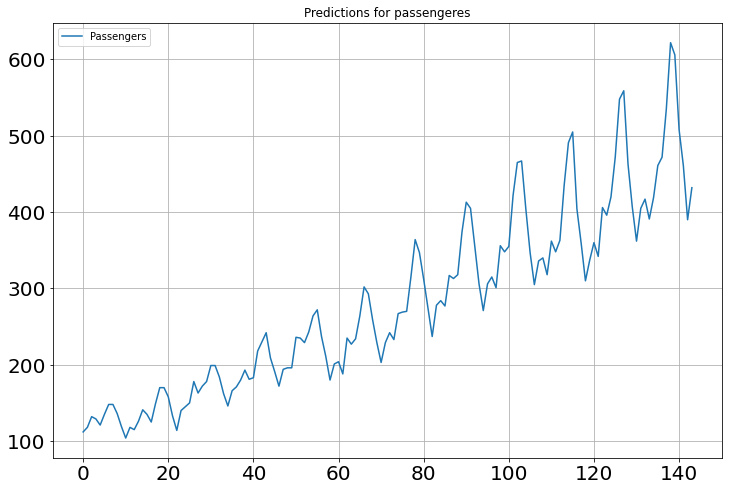

In [14]:
data[["month", "#Passengers"]]
data["#Passengers"].plot(figsize=(12, 8), title="Predictions for passengeres", fontsize=20, label="Passengers")
plt.legend()
plt.grid()
plt.show()

In [15]:
from autots import AutoTS
model = AutoTS(forecast_length=12, frequency='infer', 
               ensemble='simple')
model = model.fit(data, date_col='month', value_col='#Passengers', id_col=None)

Inferred frequency is: MS
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10


2022-05-05 08:34:55.476640: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-05 08:34:56.144709: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
5/5 [==============================] - 7s 6ms/step - loss: 0.3799
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.3801
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.3794
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.3818
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 0.3812
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3801
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3750
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3777
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3831
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3747
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3779
Epoch 12/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3746
Epoch 13/50
5/5 [==============================] - 0s 5ms/step - loss: 0.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10
Initial log joint probability = -3.51411
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       208.986   0.000376467       104.187      0.7848      0.7848      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       209.338   6.24775e-05       98.7875   7.547e-07       0.001      253  LS failed, Hessian reset 
     199       

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be rai

Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 67: GLM
Model Number: 68 with model LastValueNaive in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 70: VECM
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model MultivariateMotif in generation 0 of 10
Model Number: 73 with model GLS in generation 0 of 10
Model Number: 74 with model MultivariateMotif in generation 0 of 10
Model Number: 75 with model DatepartRegression in generation 0 of 10
Epoch 1/50
4/4 [==============================] - 4s 185ms/step - loss:

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Fatal] [tweedie]: at least one target label is negative


Initial log joint probability = -2.10007
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       939.991   0.000677466       4251.34           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       941.184   0.000526157       5099.75      0.4694           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       941.661   3.86708e-05       1803.72           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       941.849   4.99062e-06       403.664      0.3057           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        941.88   1.20694e-05       59.7648           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

 This problem is unconstrained.


Model Number: 111 with model MultivariateMotif in generation 0 of 10
Model Number: 112 with model DatepartRegression in generation 0 of 10
Epoch 1/100
2/2 [==============================] - 8s 791ms/step - loss: 38.9223 - val_loss: 33.4226
Epoch 2/100
2/2 [==============================] - 0s 112ms/step - loss: 38.7913 - val_loss: 33.4263
Epoch 3/100
2/2 [==============================] - 0s 125ms/step - loss: 38.8397 - val_loss: 33.4266
Epoch 4/100
2/2 [==============================] - 0s 97ms/step - loss: 38.8782 - val_loss: 33.4093
Epoch 5/100
2/2 [==============================] - 0s 107ms/step - loss: 38.9548 - val_loss: 33.4204
Epoch 6/100
2/2 [==============================] - 0s 104ms/step - loss: 38.8427 - val_loss: 33.4187
Epoch 7/100
2/2 [==============================] - 0s 104ms/step - loss: 38.9971 - val_loss: 33.4475
Epoch 8/100
2/2 [==============================] - 0s 116ms/step - loss: 38.8288 - val_loss: 33.4598
Epoch 9/100
2/2 [==============================] - 0s 

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 156: ETS
Model Number: 157 with model WindowRegression in generation 1 of 10
Model Number: 158 with model WindowRegression in generation 1 of 10
Epoch 1/100
3/3 [==============================] - 6s 7ms/step - loss: 0.1662
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1574
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1479
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1386
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1276
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1186
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1055
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0904
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0744
Epoch 10/100
3/3 [==================

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 184 with model SeasonalNaive in generation 1 of 10
Model Number: 185 with model SeasonalNaive in generation 1 of 10
Model Number: 186 with model SeasonalNaive in generation 1 of 10
Model Number: 187 with model SeasonalNaive in generation 1 of 10
Model Number: 188 with model AverageValueNaive in generation 1 of 10
Model Number: 189 with model AverageValueNaive in generation 1 of 10
Model Number: 190 with model AverageValueNaive in generation 1 of 10
Model Number: 191 with model SectionalMotif in generation 1 of 10
Model Number: 192 with model SectionalMotif in generation 1 of 10
Model Number: 193 with model SectionalMotif in generation 1 of 10
Model Number: 194 with model SectionalMotif in generation 1 of 10
Model Number: 195 with model UnobservedComponents in generation 1 of 10
Model Number: 196 with model UnobservedComponents in generation 1 of 10
Model Number: 197 with model UnobservedComponents in generation 1 of 10
Model Number: 198 with model FBProphet in generation 

/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Model Number: 234 with model ETS in generation 2 of 10
Model Number: 235 with model ETS in generation 2 of 10
Model Number: 236 with model ETS in generation 2 of 10
Model Number: 237 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 238 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 238: WindowRegression
Model Number: 239 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 239: WindowRegression
Model Number: 240 with model WindowRegression in generation 2 of 10
Model Number: 241 with model NVAR in generation 2 of 10
Model Number: 242 with model NVAR in 

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Model Number: 263 with model GLS in generation 2 of 10
Model Number: 264 with model SeasonalNaive in generation 2 of 10
Model Number: 265 with model SeasonalNaive in generation 2 of 10
Model Number: 266 with model SeasonalNaive in generation 2 of 10
Model Number: 267 with model SeasonalNaive in generation 2 of 10
Model Number: 268 with model AverageValueNaive in generation 2 of 10
Model Number: 269 with model AverageValueNaive in generation 2 of 10
Model Number: 270 with model AverageValueNaive in generation 2 of 10
Model Number: 271 with model SectionalMotif in generation 2 of 10
Model Number: 272 with model SectionalMotif in generation 2 of 10
Model Number: 273 with model SectionalMotif in generation 2 of 10
Model Number: 274 with model SectionalMotif in generation 2 of 10
Model Number: 275 with model UnobservedComponents in generation 2 of 10
Model Number: 276 with model UnobservedComponents in generation 2 of 10
Model Number: 277 with model UnobservedComponents in generation 2 of 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 314 with model ETS in generation 3 of 10
Model Number: 315 with model ETS in generation 3 of 10
Model Number: 316 with model ETS in generation 3 of 10
Model Number: 317 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
Model Number: 318 with model WindowRegression in generation 3 of 10
Model Number: 319 with model WindowRegression in generation 3 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 320 with model WindowRegression in generation 3 of 10
Model Number: 321 with model LastValueNaive in generation 3 of 10
Model Number: 322 with model LastValueNaive in generation 3 of 10
Model Number: 323 with model LastValueNaive in generation 3 of 10
Model Number: 324 with model ZeroesNaive in generation 3 of 10
Model Number: 325 with model ZeroesNaive in generation 3 of 10
Model Number: 326 with model ZeroesNaive in generation 3 of 10
Model Number: 327 with model Theta in generation 3 of 10
Model Number: 328 with model Theta in generation 3 of 10
Model Number: 329 with model Theta in generation 3 of 10
Model Number: 330 with model Theta in generation 3 of 10
Model Number: 331 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 331: DatepartRegression
Model Number: 332 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User'

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: overflow encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Model Number: 337 with model GLM in generation 3 of 10
Model Number: 338 with model FBProphet in generation 3 of 10
Initial log joint probability = -8.8886
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       144.616    0.00255273       6.33886           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129        144.65   0.000637661       7.19608   7.496e-05       0.001      194  LS failed, Hessian reset 
     155       144.651   1.18343e-05       5.98777   1.933e-06       0.001      279  LS failed, Hessian reset 
     176       144.651   1.50797e-07       4.57848      0.3024      0.3024      324   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Model Number: 339 with model FBProphet in generation 3 of 10
Initial log joint probability = -9.6422
    Iter      log prob        ||dx||      ||grad||       

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 390 with model MultivariateRegression in generation 4 of 10
Model Number: 391 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 392 with model ETS in generation 4 of 10
Model Number: 393 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 394 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or 

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 397 with model WindowRegression in generation 4 of 10
Model Number: 398 with model LastValueNaive in generation 4 of 10
Model Number: 399 with model LastValueNaive in generation 4 of 10
Model Number: 400 with model LastValueNaive in generation 4 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Model Number: 401 with model ZeroesNaive in generation 4 of 10
Model Number: 402 with model ZeroesNaive in generation 4 of 10
Model Number: 403 with model ZeroesNaive in generation 4 of 10
Model Number: 404 with model SectionalMotif in generation 4 of 10
Model Number: 405 with model SectionalMotif in generation 4 of 10
Model Number: 406 with model SectionalMotif in generation 4 of 10
Model Number: 407 with model SectionalMotif in generation 4 of 10
Model Number: 408 with model SeasonalNaive in generation 4 of 10
Model Number: 409 with model SeasonalNaive in generation 4 of 10
Model Number: 410 with model SeasonalNaive in generation 4 of 10
Model Number: 411 with model SeasonalNaive in generation 4 of 10
Model Number: 412 with model Theta in generation 4 of 10
Model Number: 413 with model Theta in generation 4 of 10
Model Number: 414 with model Theta in generation 4 of 10
Model Number: 415 with model Theta in generation 4 of 10
Model Number: 416 with model FBProphet in generation 4 of 1

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 426: GLM
Model Number: 427 with model AverageValueNaive in generation 4 of 10
Model Number: 428 with model AverageValueNaive in generation 4 of 10
Model Number: 429 with model AverageValueNaive in generation 4 of 10
Model Number: 430 with model GLS in generation 4 of 10
Model Number: 431 with model GLS in generation 4 of 10
Model Number: 432 with model GLS in generation 4 of 10
Model Number: 433 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 433: UnobservedComponents
Model Number: 434 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 434: UnobservedComponents
Model Number: 435 with 

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 470 with model MultivariateRegression in generation 5 of 10
Model Number: 471 with model ETS in generation 5 of 10
Model Number: 472 with model ETS in generation 5 of 10
Model Number: 473 with model ETS in generation 5 of 10
Model Number: 474 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
Model Number: 475 with model WindowRegression in generation 5 of 10
Model Number: 476 with model WindowRegression in generation 5 of 10
Model Number: 477 with model WindowRegression in generation 5 of 10
Model Number: 478 with model ZeroesNaive in generation 5 of 10
Model Number: 479 with model ZeroesNaive in generation 5 of 10
Model Number: 480 with model LastValueNaive in generation 5 of 10
Model Number: 481 with model LastValueNaive in generation 5 of 10
Model Number: 482 with model LastValueNaive in generation 5 of 10
Model Number: 483 with model Datepart

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Template Eval Error: Exception('Transformer Detrend failed on inverse') in model 500: GLM
Model Number: 501 with model GLM in generation 5 of 10
Model Number: 502 with model AverageValueNaive in generation 5 of 10
Model Number: 503 with model AverageValueNaive in generation 5 of 10
Model Number: 504 with model AverageValueNaive in generation 5 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Model Number: 505 with model GLS in generation 5 of 10
Model Number: 506 with model GLS in generation 5 of 10
Model Number: 507 with model GLS in generation 5 of 10
Model Number: 508 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 508: UnobservedComponents
Model Number: 509 with model UnobservedComponents in generation 5 of 10
Model Number: 510 with model UnobservedComponents in generation 5 of 10
Model Number: 511 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 511: GluonTS
Model Number: 512 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 512: GluonTS
Model Number: 513 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('Gluo

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 565 with model SeasonalNaive in generation 6 of 10
Model Number: 566 with model SeasonalNaive in generation 6 of 10
Model Number: 567 with model Theta in generation 6 of 10
Model Number: 568 with model Theta in generation 6 of 10
Model Number: 569 with model Theta in generation 6 of 10
Model Number: 570 with model Theta in generation 6 of 10
Model Number: 571 with model FBProphet in generation 6 of 10
Initial log joint probability = -31.1351
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       129.078   9.17289e-09       63.6709      0.3934      0.3934      113   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Model Number: 572 with model FBProphet in generation 6 of 10
Initial log joint probability = -94.5726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82      -13.4209   7.23991e-05       90.3655   8.056e-07

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 577 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 577: GLM
Model Number: 578 with model GLM in generation 6 of 10
Model Number: 579 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 579: UnobservedComponents
Model Number: 580 with model UnobservedComponents in generation 6 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/opt/conda/lib/python3.7/site-packages/autots/models/base.py:344: RuntimeWarning: overflow encountered in square
  self.squared_errors = full_errors ** 2


Model Number: 581 with model UnobservedComponents in generation 6 of 10
Model Number: 582 with model AverageValueNaive in generation 6 of 10
Model Number: 583 with model AverageValueNaive in generation 6 of 10
Model Number: 584 with model AverageValueNaive in generation 6 of 10
Model Number: 585 with model GLS in generation 6 of 10
Model Number: 586 with model GLS in generation 6 of 10
Model Number: 587 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 587: GluonTS
Model Number: 588 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 588: GluonTS
Model Number: 589 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 589: GluonTS
Model Number: 590

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    0.1s finishe

Model Number: 623 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 623: MultivariateRegression
Model Number: 624 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 624: MultivariateRegression
Model Number: 625 with model ETS in generation 7 of 10
Model Number: 626 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
Model Number: 627 with model ETS in generation 7 of 10
Model Number: 628 with model ETS in generation 7 of 10
Model Number: 629 with model ZeroesNaive in generation 7 of 10
Model Number: 630 with model ZeroesNaive in generation 7 of 10
Model Number: 631 with model ZeroesNaive in generation 7 of 10
Model Number: 632 with model LastValueNaiv

 This problem is unconstrained.


Model Number: 648 with model Theta in generation 7 of 10
Model Number: 649 with model Theta in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10204D+00    |proj g|=  4.08109D-03

At iterate    5    f=  4.10049D+00    |proj g|=  5.12923D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      6      1     0     0   5.129D-07   4.100D+00
  F =   4.1004921318301504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 650 

 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 651 with model GLM in generation 7 of 10
Model Number: 652 with model GLM in generation 7 of 10
Model Number: 653 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 653: GLM
Model Number: 654 with model UnobservedComponents in generation 7 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Model Number: 655 with model UnobservedComponents in generation 7 of 10
Model Number: 656 with model UnobservedComponents in generation 7 of 10
Model Number: 657 with model AverageValueNaive in generation 7 of 10
Model Number: 658 with model AverageValueNaive in generation 7 of 10
Model Number: 659 with model AverageValueNaive in generation 7 of 10
Model Number: 660 with model GLS in generation 7 of 10
Model Number: 661 with model GLS in generation 7 of 10
Model Number: 662 with model GLS in generation 7 of 10
Model Number: 663 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 663: GluonTS
Model Number: 664 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 664: GluonTS
Model Number: 665 with model GluonTS in generation 7 of 10
Template Eval Error: ImportEr

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encou

Model Number: 685 with model NVAR in generation 8 of 10
Model Number: 686 with model NVAR in generation 8 of 10
Model Number: 687 with model MultivariateMotif in generation 8 of 10
Model Number: 688 with model MultivariateMotif in generation 8 of 10
Model Number: 689 with model MultivariateMotif in generation 8 of 10
Model Number: 690 with model MultivariateMotif in generation 8 of 10
Model Number: 691 with model UnivariateMotif in generation 8 of 10
Model Number: 692 with model UnivariateMotif in generation 8 of 10
Model Number: 693 with model UnivariateMotif in generation 8 of 10
Model Number: 694 with model UnivariateMotif in generation 8 of 10
Model Number: 695 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 695: WindowRegression
Model Number: 696 with model WindowRegression in generation 8 of 10
Model Number: 697 with model WindowRegression in generation 8 of 10
Model Number: 698 wi

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 724 with model Theta in generation 8 of 10
Model Number: 725 with model Theta in generation 8 of 10
Model Number: 726 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 726: GLM
Model Number: 727 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 727: GLM
Model Number: 728 with model GLM in generation 8 of 10
Model Number: 729 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 729: GLM
Model Number: 730 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_r

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 797 with model Theta in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.84619D+00    |proj g|=  1.01612D+00

At iterate    5    f= -1.84675D+00    |proj g|=  1.64138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.641D-05  -1.847D+00
  F =  -1.8467477936625325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 798 with model Theta in generation 9 of 10


 This problem is unconstrained.


Model Number: 799 with model Theta in generation 9 of 10
Model Number: 800 with model Theta in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93922D+00    |proj g|=  3.41447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      4      1     0     0   8.662D-07   5.939D+00
  F =   5.9385121986663041     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 801 with model GLM in generation 9 of 10


 This problem is unconstrained.


Model Number: 802 with model GLM in generation 9 of 10
Model Number: 803 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 803: GLM
Model Number: 804 with model AverageValueNaive in generation 9 of 10
Model Number: 805 with model AverageValueNaive in generation 9 of 10
Model Number: 806 with model UnobservedComponents in generation 9 of 10
Model Number: 807 with model UnobservedComponents in generation 9 of 10
Model Number: 808 with model UnobservedComponents in generation 9 of 10
Model Number: 809 with model GLS in generation 9 of 10
Model Number: 810 with model GLS in generation 9 of 10
Model Number: 811 with model GLS in generation 9 of 10
Model Number: 812 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible w

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Model Number: 835 with model NVAR in generation 10 of 10
Model Number: 836 with model MultivariateMotif in generation 10 of 10
Model Number: 837 with model MultivariateMotif in generation 10 of 10
Model Number: 838 with model MultivariateMotif in generation 10 of 10
Model Number: 839 with model MultivariateMotif in generation 10 of 10
Model Number: 840 with model UnivariateMotif in generation 10 of 10
Model Number: 841 with model UnivariateMotif in generation 10 of 10

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Model Number: 866 with model SeasonalNaive in generation 10 of 10
Model Number: 867 with model SeasonalNaive in generation 10 of 10
Model Number: 868 with model SeasonalNaive in generation 10 of 10
Model Number: 869 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 869: DatepartRegression
Model Number: 870 with model DatepartRegression in generation 10 of 10
Model Number: 871 with model DatepartRegression in generation 10 of 10
Model Number: 872 with model Theta in generation 10 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 873 with model Theta in generation 10 of 10
Model Number: 874 with model Theta in generation 10 of 10
Model Number: 875 with model Theta in generation 10 of 10
Model Number: 876 with model GLM in generation 10 of 10
Model Number: 877 with model GLM in generation 10 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 877: GLM
Model Number: 878 with model GLM in generation 10 of 10
Model Number: 879 with model GLM in generation 10 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 879: GLM


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Model Number: 880 with model Ensemble in generation 11 of 0
Model Number: 881 with model Ensemble in generation 11 of 0
Model Number: 882 with model Ensemble in generation 11 of 0
Model Number: 883 with model Ensemble in generation 11 of 0
Model Number: 884 with model Ensemble in generation 11 of 0
Model Number: 885 with model Ensemble in generation 11 of 0
Model Number: 886 with model Ensemble in generation 11 of 0
Model Number: 887 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 133 with model Ensemble for Validation 1
1 - Ensemble with avg smape 7.17: 
Model Number: 2 of 133 with model Ensemble for Validation 1
2 - Ensemble with avg smape 7.17: 
Model Number: 3 of 133 with model Ensemble for Validation 1
3 - Ensemble with avg smape 7.61: 
Model Number: 4 of 133 with model Ensemble for Validation 1
4 - Ensemble with avg smape 7.15: 
Model Number: 5 of 133 with model Ensemble for Validation 1
5 - Ensemble with avg smape 6.99: 
Model Number: 6 of 133 wi

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


58 - SeasonalNaive with avg smape 4.09: 
Model Number: 59 of 133 with model WindowRegression for Validation 1
59 - WindowRegression with avg smape 6.16: 
Model Number: 60 of 133 with model ETS for Validation 1
60 - ETS with avg smape 11.07: 
Model Number: 61 of 133 with model NVAR for Validation 1
61 - NVAR with avg smape 5.17: 
Model Number: 62 of 133 with model NVAR for Validation 1
62 - NVAR with avg smape 5.27: 
Model Number: 63 of 133 with model FBProphet for Validation 1
Initial log joint probability = -9.36985
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -9.36985             0       118.494       1e-12       0.001       19   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = 55.842
Iteration  1. Log joint probability =    51.9172. Improved by -3.92477.
Iteration  2. Log joint probability =    76.0662. Improved by 24.

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79864D+00    |proj g|=  8.75452D-01

At iterate    5    f= -1.79913D+00    |proj g|=  1.23911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     19      1     0     0   1.239D-04  -1.799D+00
  F =  -1.7991253951562736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
89 - Theta with avg smape 15.16: 
Model Number: 90 of 133 with model ETS for Validation 1
90 - ETS with avg smape 20.93: 
Model Numb

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 58 of 133 with model SeasonalNaive for Validation 2
58 - SeasonalNaive with avg smape 14.48: 
Model Number: 59 of 133 with model WindowRegression for Validation 2
59 - WindowRegression with avg smape 5.84: 
Model Number: 60 of 133 with model ETS for Validation 2
60 - ETS with avg smape 7.03: 
Model Number: 61 of 133 with model NVAR for Validation 2
61 - NVAR with avg smape 5.43: 
Model Number: 62 of 133 with model NVAR for Validation 2
62 - NVAR with avg smape 5.63: 
Model Number: 63 of 133 with model FBProphet for Validation 2
Initial log joint probability = -8.01174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.01174             0       105.255       1e-12       0.001       20   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = 68.2273
Iteration  1. Log joint probability =    47.5982. Improved by -20.6292

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.85463D+00    |proj g|=  1.04999D+00

At iterate    5    f= -1.85528D+00    |proj g|=  1.25648D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.256D-06  -1.855D+00
  F =  -1.8552806641310449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
89 - Theta with avg smape 6.99: 
Model Number: 90 of 133 with model ETS for Validation 2
90 - ETS with avg smape 3.64: 
Model Number

In [16]:
prediction = model.predict()
forecast = prediction.forecast
print("Passengers Forecast")
print(forecast)

Passengers Forecast
            #Passengers
1961-01-01   443.053324
1961-02-01   417.053324
1961-03-01   444.966031
1961-04-01   486.966031
1961-05-01   497.966031
1961-06-01   560.966031
1961-07-01   647.966031
1961-08-01   631.966031
1961-09-01   533.966031
1961-10-01   486.966031
1961-11-01   415.966031
1961-12-01   457.966031


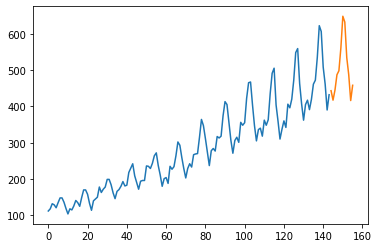

In [17]:
import numpy as np
data_air=data.set_index('month')
plt.plot(np.arange(144), data_air)
plt.plot(np.arange(144, 144+12), forecast)
plt.show()

## Darts

pip install darts

In [18]:
#Loading the package
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(data, 'month', '#Passengers')

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [19]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


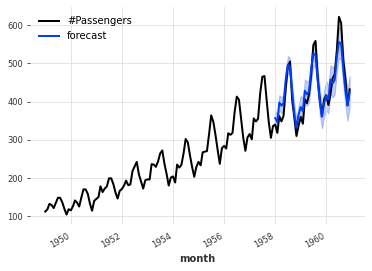

In [20]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

## Kats

pip install kats

In [21]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams

In [22]:
data.columns = ['month','#Passengers']
data['month'] = pd.to_datetime(data['month'],infer_datetime_format=True,format='%y%m')

In [23]:
df_s = TimeSeriesData(time=data['month'], value=data['#Passengers'])
df_s

,month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [24]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative')

# create a prophet model instance
model = ProphetModel(df_s, params)

# fit model simply by calling m.fit()
model.fit()

# make prediction for next 30 month
forecast = model.predict(steps=30, freq="MS")
forecast.head()

Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.449     0.0176543       240.422       0.649           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.353    0.00108498       90.0341      0.3062      0.3062      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.446   0.000140197        80.679           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       503.467   9.96247e-05       114.472   7.079e-07       0.001      451  LS failed, Hessian reset 
     359       503.486   8.82342e-09       72.6598    0.004982           1      538   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


,time,fcst,fcst_lower,fcst_upper
0,1961-01-01,452.077721,437.969393,464.900288
1,1961-02-01,433.529496,420.675247,446.622315
2,1961-03-01,492.499917,480.237041,505.872860
3,1961-04-01,495.895518,482.655084,509.877115
4,1961-05-01,504.532773,491.436447,517.733568


<AxesSubplot:xlabel='month'>

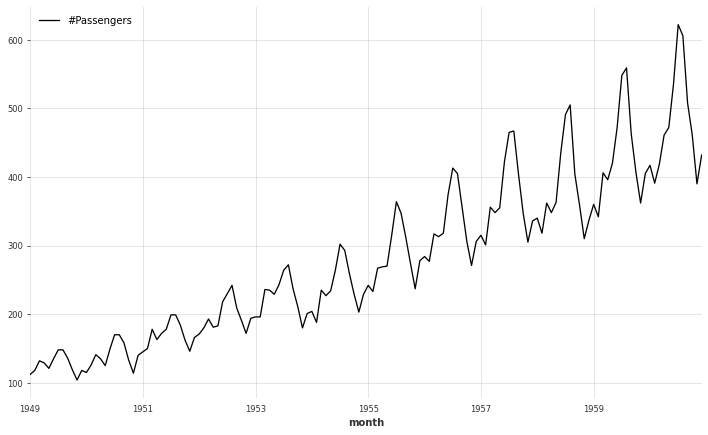

In [25]:
df_s.plot(cols=['#Passengers'])

In [26]:
# Creating two slices
ts_1 = df_s[0:3]
ts_2 = df_s[3:7]
 
ts_1.extend(ts_2)
ts_1

,month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148


In [27]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative')

# create a prophet model instance
model = ProphetModel(df_s, params)

# fit model simply by calling m.fit()
model.fit()

# make prediction for next 30 month
forecast = model.predict(steps=30, freq="MS")
forecast.head()

Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.449     0.0176543       240.422       0.649           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.353    0.00108498       90.0341      0.3062      0.3062      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.446   0.000140197        80.679           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       503.467   9.96247e-05       114.472   7.079e-07       0.001      451  LS failed, Hessian reset 
     359       503.486   8.82342e-09       72.6598    0.004982           1      538   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


,time,fcst,fcst_lower,fcst_upper
0,1961-01-01,452.077721,438.133669,465.379116
1,1961-02-01,433.529496,420.569616,446.864959
2,1961-03-01,492.499917,478.899274,505.942641
3,1961-04-01,495.895518,482.972782,509.208243
4,1961-05-01,504.532773,492.160215,518.405717


<AxesSubplot:xlabel='time', ylabel='y'>

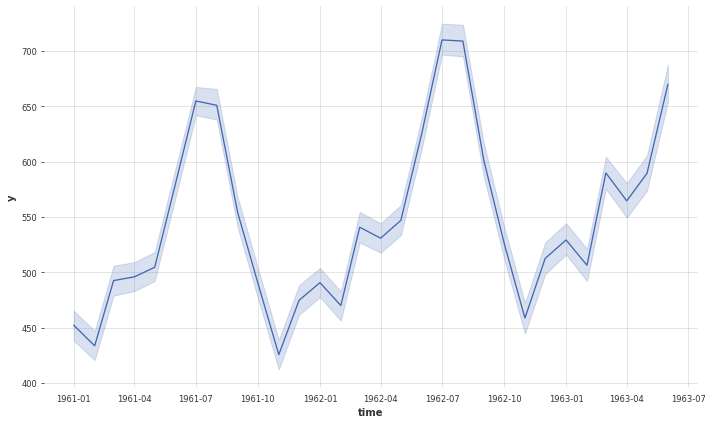

In [28]:
model.plot()

## GreyKite

pip install greykite

In [29]:
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster 
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results

In [30]:
# Specifies dataset information
metadata = MetadataParam(
     time_col="month",  # name of the time column
     value_col="#Passengers",  # name of the value column
     freq="MS"  #"MS" for Montly at start date
 )
forecaster = Forecaster()
result = forecaster.run_forecast_config(
     df=data,
     config=ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=100,  # forecasts 100 steps ahead
         coverage=0.95,  # 95% prediction intervals
         metadata_param=metadata
    )
)

/opt/conda/lib/python3.7/site-packages/greykite/framework/pipeline/pipeline.py:186: UserWarning:

Not enough training data to forecast the full forecast_horizon. Exercise extra caution with forecasted values after 72 periods.

/opt/conda/lib/python3.7/site-packages/greykite/framework/pipeline/pipeline.py:199: UserWarning:

test_horizon should be <= than 1/3 of the data set size to allow enough data to train a backtest model. Consider reducing to 48. If this is smaller than the forecast_horizon, you will need to make a trade-off between setting test_horizon=forecast_horizon and having enough data left over to properly train a realistic backtest model.

/opt/conda/lib/python3.7/site-packages/greykite/sklearn/cross_validation.py:191: UserWarning:

There are no CV splits under the requested settings. Decrease `forecast_horizon` and/or `min_train_periods`. Using default 90/10 CV split

/opt/conda/lib/python3.7/site-packages/greykite/algo/forecast/silverkite/forecast_simple_silverkite_helper

Fitting 1 folds for each of 1 candidates, totalling 1 fits


/opt/conda/lib/python3.7/site-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:2560: UserWarning:

The granularity of data is larger than daily. Ensure the daily events data match the timestamps

/opt/conda/lib/python3.7/site-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:2560: UserWarning:

The granularity of data is larger than daily. Ensure the daily events data match the timestamps

/opt/conda/lib/python3.7/site-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:2560: UserWarning:

The granularity of data is larger than daily. Ensure the daily events data match the timestamps

/opt/conda/lib/python3.7/site-packages/greykite/algo/forecast/silverkite/forecast_simple_silverkite_helper.py:130: UserWarning:

Requested holiday 'Easter Monday [England, Wales, Northern Ireland]' does not occur in the provided countries

/opt/conda/lib/python3.7/site-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:2560: UserWarning:

The g

In [31]:
ts = result.timeseries
fig = ts.plot()
plotly.io.show(fig)

In [32]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

In [33]:
fig = backtest.plot_components()
plotly.io.show(fig) 